In [1]:
import pandas as pd
import seaborn as sns

from math import floor
from copy import deepcopy

import random

In [2]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [11]:
!pip3 install sklearn

In [22]:
pip install scikit-learn

   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB 660.6 kB/s eta 0:00:14
   ---------------------------------------- 0.0/9.1 MB 660.6 kB/s eta 0:00:14
   ---------------------------------------- 0.0/9.1 MB 660.6 kB/s eta 0:00:14
   ---------------------------------------- 0.0/9.1 MB 660.6 kB/s eta 0:00:14
   ---------------------------------------- 0.0/9.1 MB 660.6 kB/s eta 0:00:14
   ---------------------------------------- 0.0/9.1 MB 140.3 kB/s eta 0:01:05
   ---------------------------------------- 0.0/9.1 MB 140.3 kB/s eta 0:01:05
   ---------------------------------------- 0.0/9.1 MB 140.3 kB/s eta 0:01:05
   ---------------------------------------- 0.0/9.1 MB 140.3 kB/s eta 0:01:05
   ---------------------------------------- 0.0/9.1 MB 140.3 kB/s eta 0:01:05
   ----------

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
import sklearn

In [2]:
class ShuffleOnceRandom():
    
    #A random number generator that forbids the shuffle function from being used more than once.
    
    def __init__(self, seed=None):
        import random
        
        self._random_gen = random.Random(seed)
        self._shuffle_cnt = 0
        
    def shuffle(self, l):
        if self._shuffle_cnt > 0:
            raise RuntimeError('Нельзя использовать функцию shuffle больше одного раза')
            
        self._shuffle_cnt += 1
        self._random_gen.shuffle(l)

In [3]:
class ChoicesNRandom():
    
    #Random number generator that prohibits the use the choices function more than n times.
    
    def __init__(self, seed=None, n=1):
        import random
        
        self._random_gen = random.Random(seed)
        self._choices_cnt = 0
        self._n = n
        
    def choices(self, *args, **kwargs):
        if self._choices_cnt >= self._n:
            raise RuntimeError(f'Нельзя использовать функцию choices больше {self._n} раз')
            
        self._choices_cnt += 1
        return self._random_gen.choices(*args, **kwargs)

## Split into validation, train,test 

In [4]:
def train_test_split_solution(data, 
                              train_frac,
                              random_gen):
    """
    Splits a list into training and testing sets.
    
    Args: data: List to split, train_frac: Fraction for training set, random_gen: Random number generator.
        
    Returns: Two lists: training set and testing set.
    """

    
    datan = deepcopy(data)
    n = floor(len(data) * train_frac)
    random_gen.shuffle(datan)
    return datan[:n], datan[n:]

In [99]:
xt = [[1], [3], [3]]
yt = [1, 2, 3]

In [100]:
model = LinearRegression()
model.fit(xt, yt)

LinearRegression()

In [101]:
x_test = [[4], [5], [6]]
y_test = [4, 6, 5]

In [139]:
model.predict([[4]])

array([3.25])

In [89]:
round_to_3(score_model(model, x_test, y_test))

1.0

## Cross validation

In [90]:
def round_to_3(x):
    
    return round(x, 3)

In [5]:
def split_into_k(l, k):
    """
    Splits a list into k parts.
    
    Arguments:
        l: The list of items.
        k: The number of parts to split the list into.
    
    Return value:
        Returns a list of k parts of the original list.
    """

    
    l_mod_k = len(l) % k
    l_div_k = len(l) // k
    
    res = []
    
    for i in range(k):
        res.append(l[i * l_div_k:(i + 1) * l_div_k])
        
    for i in range(l_mod_k):
        res[i].append(l[l_div_k * k + i])
        
    return res

def score_model(model, x_test, y_test):
    """
    Evaluates model accuracy using the "mean deviation from the predicted value" metric.
    
    Arguments:
        model: The model.
        x_test: List of test sample items.
        y_test: List of target values for the test sample items.
            
    Return value:
        Model accuracy.
    """

    
    y_pred = model.predict(x_test)
    
    res = 0

    for i in range(len(y_test)):
        res += abs(y_pred[i] - y_test[i])
        
    return res / len(y_test)

In [7]:
def k_fold_solution(model, data_x, data_y, k, random_gen):
    """
    Performs k-Fold cross-validation on a given model.
    
    Args:
        model: The model to evaluate.
        data_x: List of items to build the model from.
        data_y: List of target values for each item.
        k: Number of folds.
        random_gen: Random number generator.
            
    Returns:
        Average accuracy over k-Fold iterations.
    """

    q = 0
    data_xy = list(zip(data_x, data_y))
    random_gen.shuffle(data_xy)
    data_xs, data_ys = [], []
    
    for i in range(len(data_xy)):
        data_xs.append(data_xy[i][0])
        data_ys.append(data_xy[i][1])
        
    data_xs = split_into_k(data_xs, k)
    data_ys = split_into_k(data_ys, k)
    
    for i in range(k):
        xvi, yvi = data_xs[i], data_ys[i]
        xtic, ytic = (data_xs[:i] + data_xs[i + 1:]), (data_ys[:i] + data_ys[i + 1:])
        xti, yti = [], []
        
        for j in range(len(xtic)):
            xti.extend(xtic[j])
            yti.extend(ytic[j])
            
        model.fit(xti, yti)
        q += score_model(model, xvi, yvi)
    
    return round_to_3(q / k)
    

In [146]:
data_x_example_1 = [[1], [2], [3]]
data_y_example_1 = [1, 2, 3]

In [147]:
k_fold_solution(LinearRegression(), data_x_example_1, data_y_example_1, 3, ShuffleOnceRandom(0))

0.0

## Quality assessment error

In [172]:
error_modeling_data = pd.read_csv('error_modelling.csv')

In [173]:
y = list(error_modeling_data['y'])
y_pred = list(error_modeling_data['y_pred'])

In [174]:
y_and_y_pred = list(zip(y, y_pred))

In [6]:
error_modeling_random_gen = random.Random(0)

errs = []

for i in range(10_000):

    # Generate a random sample and evaluate model accuracy.
    
    a = error_modeling_random_gen.sample(y_and_y_pred, 100)
    qi = 0
    for el in a:
        qi += abs(el[0] - el[1])
    errs.append(qi / 100)

NameError: name 'random' is not defined

<Axes: ylabel='Count'>

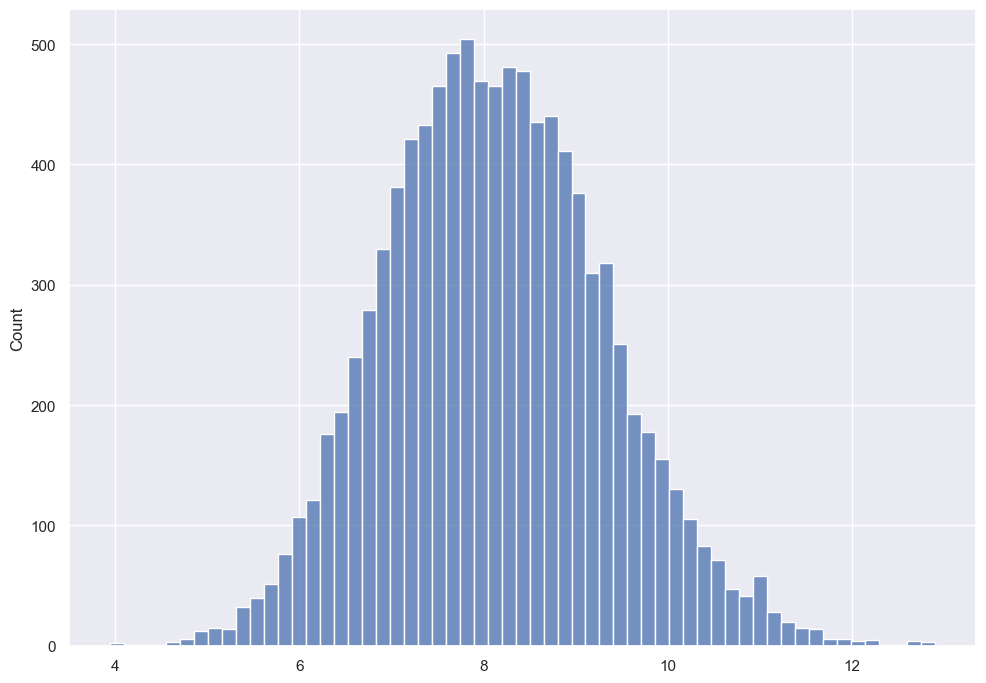

In [183]:
sns.histplot(errs)

In [184]:
q = 0
for el in y_and_y_pred:
    q += abs(el[0] - el[1])
q /= len(y_and_y_pred)

In [185]:
q

8.127045902234972

In [186]:
q1 = sum(errs) / len(errs)

In [187]:
q1

8.13134328028412

In [188]:
abs(q1 - q)

0.004297378049148648

In [190]:
s = 0
for el in errs:
    s += (el - q1) ** 2
s = (s / len(errs)) ** (1/2)

In [191]:
s

1.20548854874002

## Bootstrap

In [8]:
def cut_on_edges(l, fraction_to_cut):
    """
    Trims a specified fraction of elements from both ends of a list.
    
    Args:
        l: List of elements.
        fraction_to_cut: Fraction of elements to trim.
    
    Returns:
        New list with trimmed elements.
    """
    
    to_cut = floor(len(l) * fraction_to_cut)
    return l[to_cut:len(l) - to_cut]

In [9]:
def bootstrap_confidence_interval_solution(y, y_pred, fraction_to_cut, random_gen):
    """
    Calculates confidence interval for model accuracy using bootstrap.
    
    Args:
        y: Actual target values for the test sample.
        y_pred: Predicted target values.
        fraction_to_cut: Fraction of bootstrap values to trim.
        random_gen: Random number generator.
            
    Returns:
        Confidence interval for model accuracy.
    """
    
    y_y_pred = list(zip(y, y_pred))
    m = len(y_y_pred)
    err = []

    for i in range(10000):
        b = random_gen.choices(y_y_pred, k=m)
        qj = 0
        for e in b:
            qj += abs(e[0] - e[1])
        err.append(qj / m)
        
    #print(len(sorted(errs)))
    er = cut_on_edges(sorted(err), fraction_to_cut)
    return round_to_3(er[0]), round_to_3(er[-1])

In [263]:
error_modeling_data = pd.read_csv('error_modelling.csv')
    
y = list(error_modeling_data['y'])
y_pred = list(error_modeling_data['y_pred'])

random_gen_example_1 = ChoicesNRandom(0, n=10000)

In [264]:
bootstrap_confidence_interval_solution(y, y_pred, 0.025, random_gen_example_1)

(7.346, 8.915)